In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_dir = '../out3/'

In [3]:
def get_bill_num(filename):
    parts = filename.split('_')
    
    file_type = parts[0] # bill or summary
    
    main_part = parts[2]
    bill_name = re.split('(\d+)', main_part)
    bill_type = bill_name[0] # HR, S, HCONRES, etc.
    bill_num = bill_name[1] # number
    
    version = parts[3].split('.')[0] # version
    
    return (file_type, bill_type, bill_num, version)

In [4]:
def get_length(file_dir, filename): # length in sentences
    path = file_dir + filename
    with open(path) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [5]:
all_bills = {}
for filename in os.listdir(file_dir):
    file_type, bill_type, bill_num, version = get_bill_num(filename) # bill info

    if (bill_type, bill_num) in all_bills.keys():
        pass
    else:
        all_bills[(bill_type, bill_num)] = {}
        all_bills[(bill_type, bill_num)]['bill_type'] = bill_type
        all_bills[(bill_type, bill_num)]['bill_num'] = bill_num
        all_bills[(bill_type, bill_num)]['version'] = version

    if file_type == 'BILL':
        all_bills[(bill_type, bill_num)]['bill_length'] = get_length(file_dir, filename)
    else:
        all_bills[(bill_type, bill_num)]['summary_length'] = get_length(file_dir, filename)

In [6]:
all_bills_list = []
for k,v in all_bills.items():
    all_bills_list.append(v)

In [7]:
length_data = pd.DataFrame(all_bills_list)

In [8]:
length_data.head()

,bill_length,bill_num,bill_type,summary_length,version
0,30,492,HRES,2,IH
1,5,632,HR,1,IH
2,11,1117,HR,4,EH
3,23,699,HR,5,EH
4,12,22,SRES,4,IS


In [9]:
length_data.groupby(['bill_type']).size()

bill_type
HCONRES      85
HJRES       116
HR         2844
HRES        534
S          1270
SCONRES      27
SJRES        48
SRES        268
dtype: int64

In [10]:
length_data.groupby(['bill_type']).median()

,bill_length,summary_length
bill_type,,
HCONRES,15,2
HJRES,5,2
HR,23,3
HRES,14,2
S,29,3
SCONRES,11,2
SJRES,4,2
SRES,17,3


In [11]:
type_map = {'HCONRES': 'Continuing Resolution', 'HJRES': 'Joint Resolution', 'HR': 'Bill', 'HRES': 'Resolution',
           'S': 'Bill', 'SCONRES': 'Continuing Resolution', 'SJRES': 'Joint Resolution', 'SRES': 'Resolution'}
length_data['bill_type_full'] = length_data.apply(lambda x: type_map[x['bill_type']], axis=1)

In [12]:
length_data['house'] = length_data.apply(lambda x: 'House' if x['bill_type'][0] == 'H' else 'Senate', axis=1)

In [13]:
length_data.head()

,bill_length,bill_num,bill_type,summary_length,version,bill_type_full,house
0,30,492,HRES,2,IH,Resolution,House
1,5,632,HR,1,IH,Bill,House
2,11,1117,HR,4,EH,Bill,House
3,23,699,HR,5,EH,Bill,House
4,12,22,SRES,4,IS,Resolution,Senate


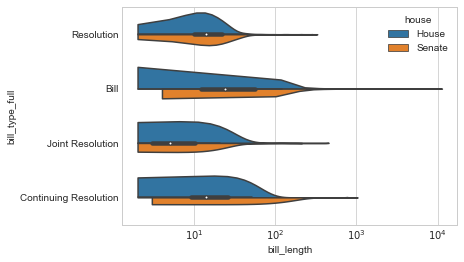

In [14]:
sns.set_style("whitegrid")
g = sns.violinplot(x='bill_length', y='bill_type_full', data=length_data, hue='house', split=True, scale='count', 
              dodge=True, cut=0)
g.set_xscale('log')

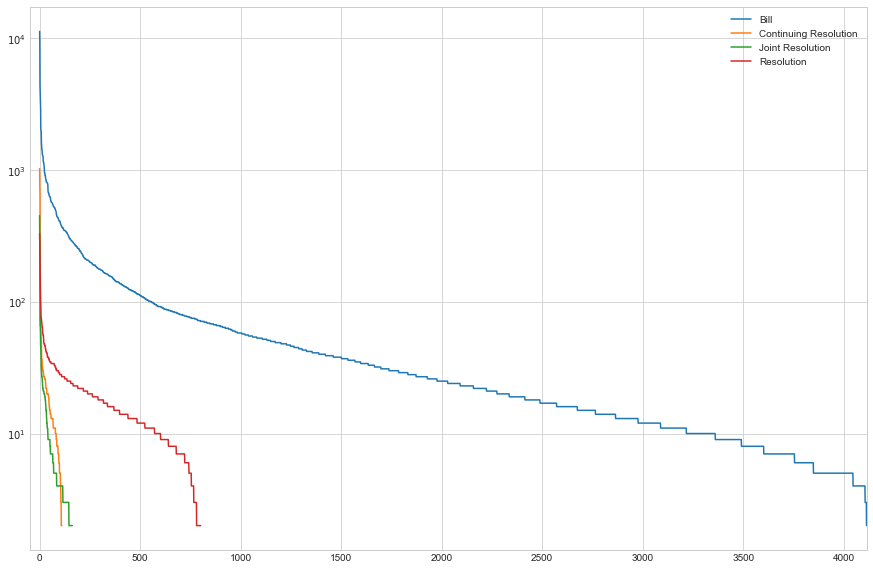

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
labels = []
for key, grp in length_data.groupby(['bill_type_full']):
    grp.reset_index(inplace=True)
    ax = grp.sort_values('bill_length', ascending=False).plot(ax=ax, kind='line', x=grp.index, y='bill_length')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlim(-50)
ax.set_yscale('log')
plt.show()

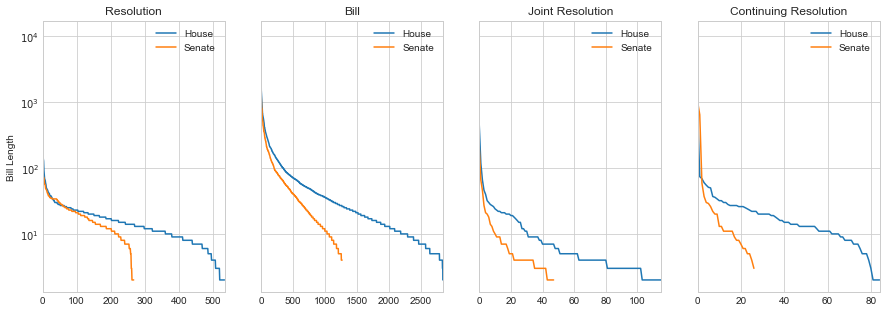

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey=True)
bill_types = list(length_data['bill_type_full'].unique())

for i, bill_type in enumerate(bill_types):
    subset = length_data[length_data['bill_type_full'] == bill_type]
    labels = []
    for key, grp in subset.groupby(['house']):
        grp.reset_index(inplace=True)
        ax[i] = grp.sort_values('bill_length', ascending=False).plot(ax=ax[i], kind='line', x=grp.index, y='bill_length')
        labels.append(key)
    lines, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(lines, labels, loc='best')
    ax[i].set_yscale('log')
    ax[i].set_title(bill_type)
ax[0].set_ylabel('Bill Length')
plt.show()

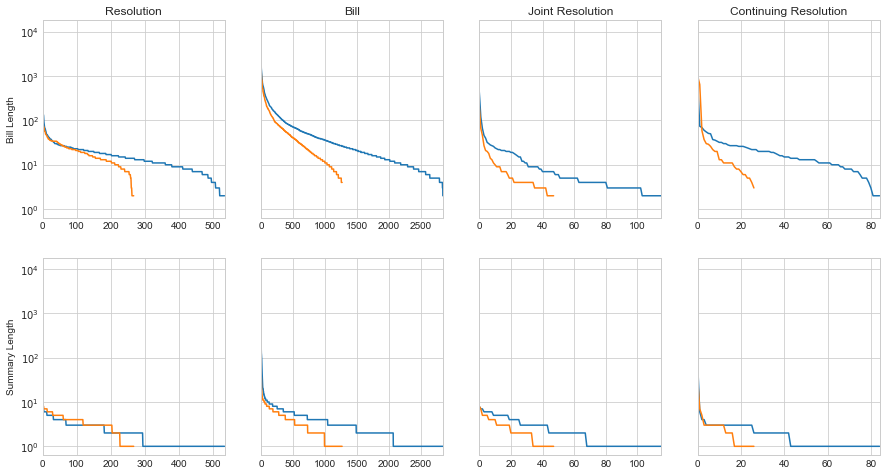

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8), sharey=True)
bill_types = list(length_data['bill_type_full'].unique())

for i, bill_type in enumerate(bill_types):
    subset = length_data[length_data['bill_type_full'] == bill_type]
    labels0 = []
    labels1 = []
    for key, grp in subset.groupby(['house']):
        grp.reset_index(inplace=True)
        ax[0,i] = grp.sort_values('bill_length', ascending=False).plot(ax=ax[0,i], kind='line', x=grp.index, y='bill_length')
        ax[1,i] = grp.sort_values('summary_length', ascending=False).plot(ax=ax[1,i], kind='line', x=grp.index, y='summary_length')
        labels.append(key)
    lines0, _ = ax[0,i].get_legend_handles_labels()
    lines1, _ = ax[1,i].get_legend_handles_labels()
    ax[0,i].legend(lines0, labels0, loc='best')
    ax[1,i].legend(lines1, labels1, loc='best')
    ax[0,i].set_yscale('log')
    ax[1,i].set_yscale('log')
    ax[0,i].set_title(bill_type)
ax[0,0].set_ylabel('Bill Length')
ax[1,0].set_ylabel('Summary Length')
plt.show()

In [18]:
bills_only = length_data[length_data['bill_type_full'] == 'Bill']

In [19]:
bills_only.head()

,bill_length,bill_num,bill_type,summary_length,version,bill_type_full,house
1,5,632,HR,1,IH,Bill,House
2,11,1117,HR,4,EH,Bill,House
3,23,699,HR,5,EH,Bill,House
6,14,1108,S,1,IS,Bill,Senate
7,80,2329,HR,5,IH,Bill,House


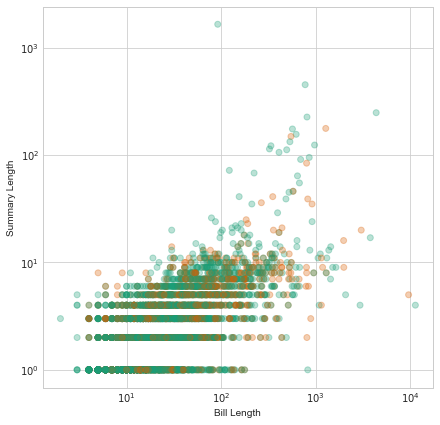

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
cmap = {'House': '#1b9e77', 'Senate': '#d95f02'}
ax.scatter(bills_only['bill_length'], bills_only['summary_length'],
                c=bills_only['house'].apply(lambda x: cmap[x]), alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Bill Length')
plt.ylabel('Summary Length')